# **Download dataset St.Lucia from Google Drive**

In [1]:
from google.colab import drive
import os
import sys, os

if not os.path.isfile('/content/st_lucia.zip'):
    !gdown --id 1nEmjnEePTQNdB0JdKFE8ISJMcfbZMPPZ
    !jar xvf  "/content/st_lucia.zip"

if not os.path.isdir('/content/st_lucia'):
    print("Dataset St.Lucia doesn't exist")

Downloading...
From: https://drive.google.com/uc?id=1nEmjnEePTQNdB0JdKFE8ISJMcfbZMPPZ
To: /content/st_lucia.zip
100% 123M/123M [00:00<00:00, 219MB/s]
  created: st_lucia/
  created: st_lucia/images/
  created: st_lucia/images/test/
  created: st_lucia/images/test/database/
 inflated: st_lucia/images/test/database/@0499638.99@6958015.36@56@J@-27.50151@0152.99634@100909_0845_03448@@@@@@@@.jpg
 inflated: st_lucia/images/test/database/@0499641.13@6958024.04@56@J@-27.50143@0152.99636@100909_0845_12835@@@@@@@@.jpg
 inflated: st_lucia/images/test/database/@0499642.44@6958011.85@56@J@-27.50154@0152.99638@100909_0845_12908@@@@@@@@.jpg
 inflated: st_lucia/images/test/database/@0499643.10@6958027.55@56@J@-27.50140@0152.99638@100909_0845_03382@@@@@@@@.jpg
 inflated: st_lucia/images/test/database/@0499644.09@6958028.28@56@J@-27.50139@0152.99639@100909_0845_12804@@@@@@@@.jpg
 inflated: st_lucia/images/test/database/@0499647.05@6958032.72@56@J@-27.50135@0152.99642@100909_0845_03367@@@@@@@@.jpg
 infla

# **Explore the St.Lucia dataset**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler

**Count images in each set**

In [3]:
dir = "/content/st_lucia/images/"
folders = ['test']
subfolders = ['database', 'queries']

matrix = []
for f in folders:
    submatrix = []
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        number_files = len(files)
        submatrix.append(number_files)
    matrix.append(submatrix)

pd.DataFrame(matrix, columns = subfolders, index = folders)

,database,queries
test,1549,1464


**Plot data distribution** 
<br/><br/>
We want to understand how dense it is and the distribution of the labels

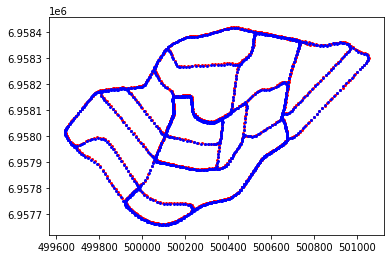

In [19]:
fig, ax = plt.subplots()
custom_cycler=(cycler(color=['r','b']))
ax.set_prop_cycle(custom_cycler)
for f in folders:
    for sf in subfolders:
        UTM_easting = []
        UTM_northing = []
        UTM = np.array([(name.split("@")[1], name.split("@")[2]) for name in os.listdir(dir+f+"/"+sf+"/")]).astype(float)
        ax.scatter(UTM[:,0], UTM[:,1], marker='.', linewidth=0)

**Print some images**

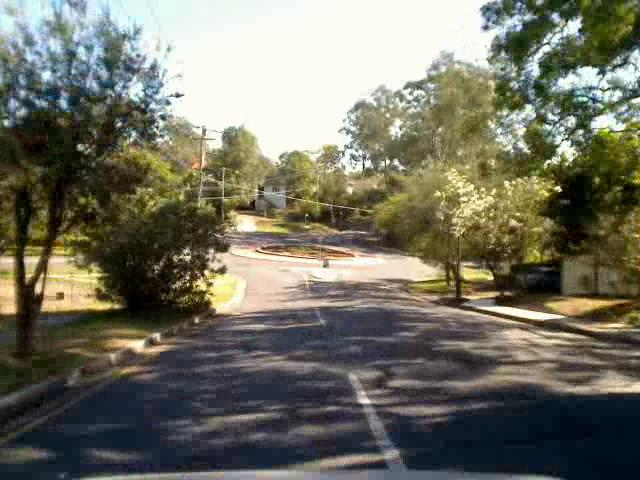

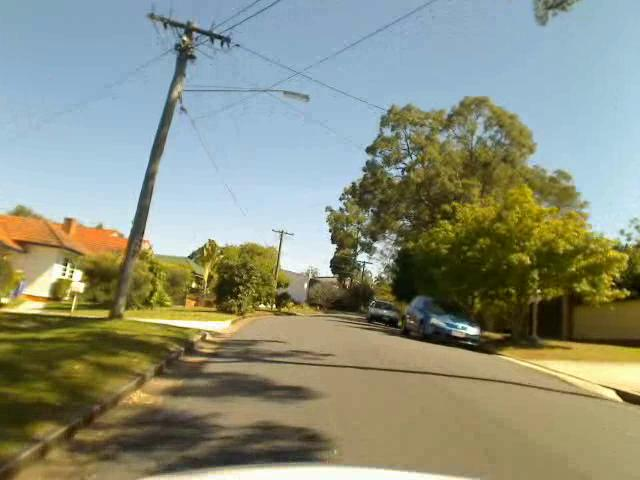

<Figure size 1800x288 with 0 Axes>

In [20]:
from random import sample
from IPython.core.display import Image, display

fig = plt.figure(figsize=(25, 4))
for f in folders:
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        random_image = sample(files,1)  
        display(Image(filename=dir+f+"/"+sf+"/"+random_image[0]))